# Prediksi Harga mobil menggunakan data penjualan mobil di India

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r"C:\Mini_H\belajar\car_prediction\data\raw\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
## Info dasar tentang dataset
print("Ukuran dataset:", df.shape)
print("\n Info Kolom:")
print(df.info())

print("\n Statistik ringkas:")
print(df.describe())

Ukuran dataset: (301, 9)

 Info Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

 Statistik ringkas:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886

In [14]:
# mnghitung nilai null pada setiap kolom
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
#Nilai Unik Tiap Kolom Kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

Car_Name: 98 nilai unik
Fuel_Type: 3 nilai unik
Seller_Type: 2 nilai unik
Transmission: 2 nilai unik


In [17]:
## Cek Duplikasi dan anomali
print("\n📦 Jumlah duplikat:", df.duplicated().sum())
print("🔎 Nilai Selling_Price <= 0:", (df['Selling_Price'] <= 0).sum())
print("🔎 Rentang tahun:", df['Year'].min(), "sampai", df['Year'].max()) 


📦 Jumlah duplikat: 2
🔎 Nilai Selling_Price <= 0: 0
🔎 Rentang tahun: 2003 sampai 2018


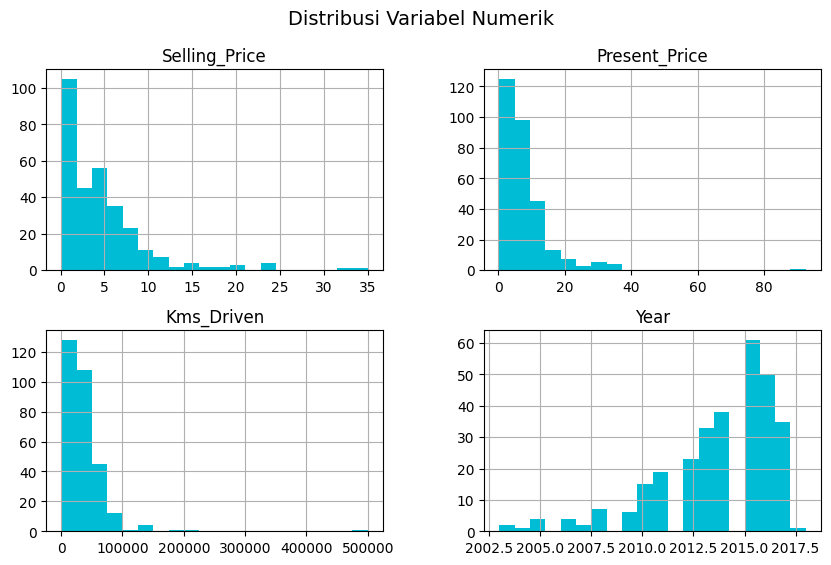

In [25]:
# distribusi variabel numerik
num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']
df[num_cols].hist(bins=20, figsize=(10, 6), color='#00bcd4')
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()


C:\Users\Mugis\AppData\Local\Temp\ipykernel_13356\4071863315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")
C:\Users\Mugis\AppData\Local\Temp\ipykernel_13356\4071863315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")
C:\Users\Mugis\AppData\Local\Temp\ipykernel_13356\4071863315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


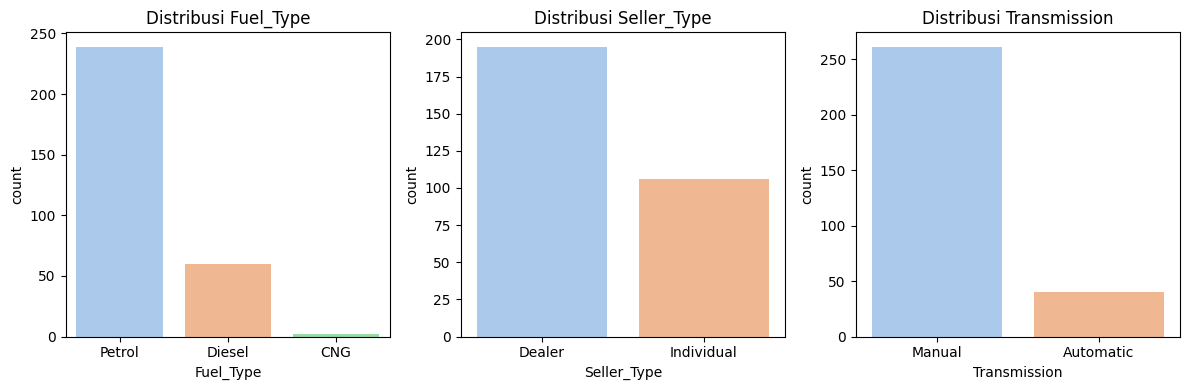

In [30]:
# distribusi variabel kategorik
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
plt.figure(figsize=(12, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

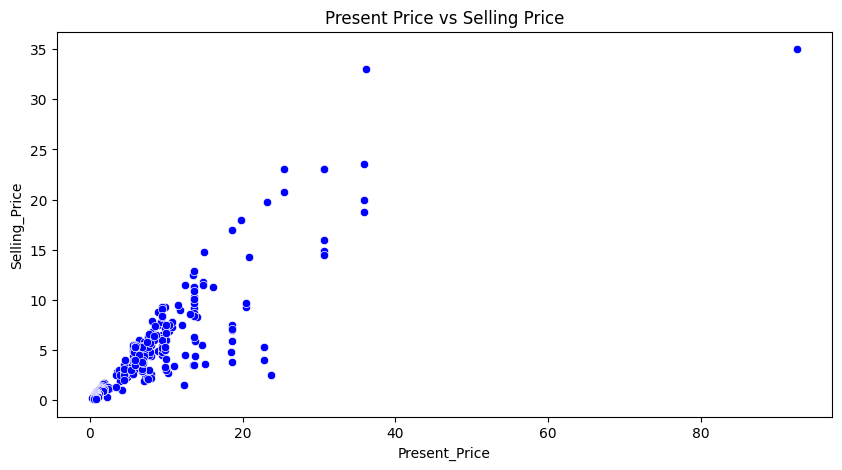

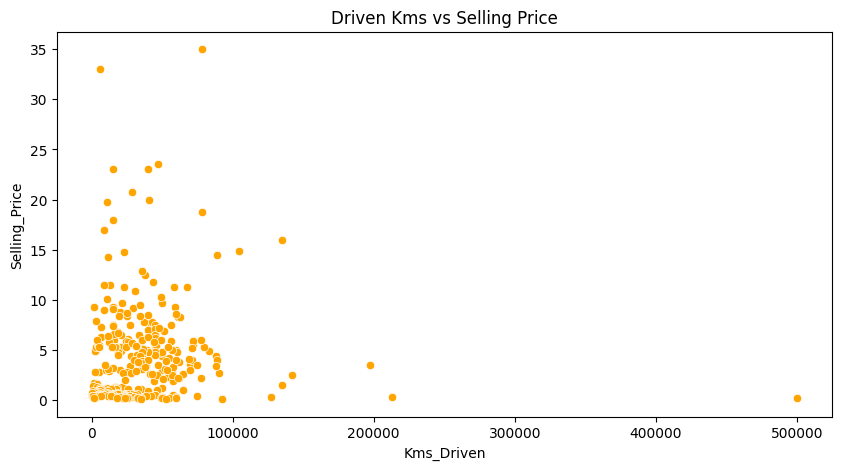

In [31]:
#Hubungan antar Variabel dengan Target
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, color='blue')
plt.title("Present Price vs Selling Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=df, color='orange')
plt.title("Driven Kms vs Selling Price")
plt.show()

C:\Users\Mugis\AppData\Local\Temp\ipykernel_13356\1708035607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Selling_Price', data=df, palette="pastel")
C:\Users\Mugis\AppData\Local\Temp\ipykernel_13356\1708035607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Selling_Price', data=df, palette="pastel")
C:\Users\Mugis\AppData\Local\Temp\ipykernel_13356\1708035607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Selling_Price', data=df, palette="pastel")


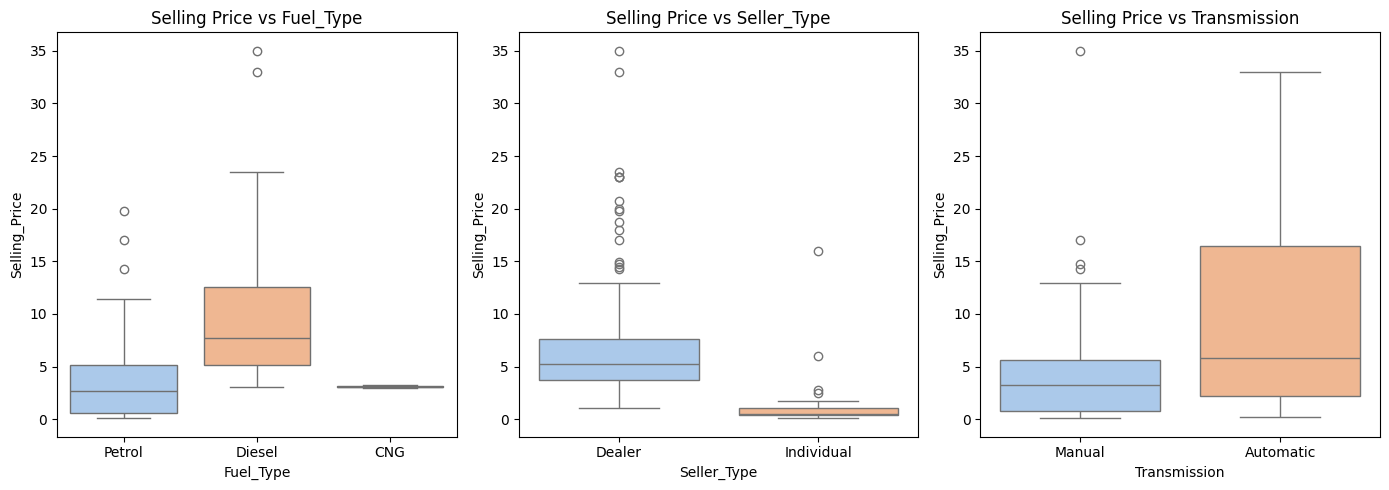

In [32]:
plt.figure(figsize=(14, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=col, y='Selling_Price', data=df, palette="pastel")
    plt.title(f"Selling Price vs {col}")
plt.tight_layout()
plt.show()

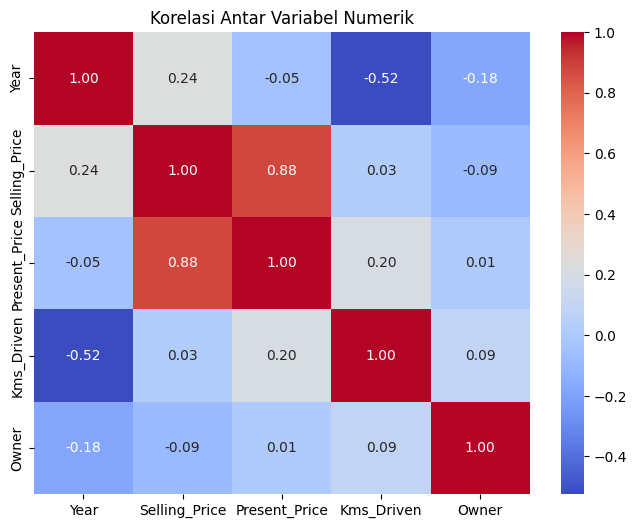

In [33]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik")
plt.show()

Korelasi kuat antara Present_Price dan Selling_Price — masuk akal karena harga baru tinggi → harga jual tinggi.

Driven_kms berbanding terbalik dengan harga jual → semakin jauh dikendarai, harga makin turun.

Fuel_Type: mobil Diesel sedikit lebih mahal daripada Petrol.

Transmission: mobil Manual jauh lebih banyak daripada Automatic.

Year: mobil lebih baru → harga lebih tinggi (trend menurun seiring umur mobil).

Jadi fitur utama yang paling penting kemungkinan besar:

Present_Price, Year, Driven_kms, Fuel_Type, Transmission

Data Siap untuk Tahap Preprocessing:

Drop kolom Car_Name → tidak relevan, terlalu banyak kategori.

Ubah kolom Year menjadi Car_Age
→ Car_Age = 2025 - Year

Encoding kolom kategorikal:

Fuel_Type, Seller_Type, Transmission → pakai LabelEncoder atau OneHotEncoder.

Hapus duplikat baris (2 data)

Normalisasi atau scaling (opsional)

Misalnya Driven_kms dan Present_Price agar skala setara.